In [1]:
# import packages needed 
import pandas as pd
import geopandas as gpd
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm
import mapclassify as mc
import shapely as shp
from legendgram import legendgram
import palettable.matplotlib as palmpl
import esda
import libpysal as lps
from mgwr.sel_bw import Sel_BW
from mgwr.gwr import GWR, MGWR
import libpysal as ps

In [2]:
#Import data
zone = gpd.read_file('LSOA1.shp')
zone = zone.to_crs(epsg=27700)
zone.crs
zone.head(5)

,LSOA11CD,LSOA11NM,MSOA11CD,MSOA11NM,LAD11CD,LAD11NM,RGN11CD,RGN11NM,USUALRES,HHOLDRES,...,children,qualificat,Income,private,white,usual,unemploy,fire,density,geometry
0,E01000056,Barking and Dagenham 018C,E02000019,Barking and Dagenham 018,E09000002,Barking and Dagenham,E12000007,London,1584,1542,...,25.654450,16.5,27991.18909,15.7,67.550505,97.948718,11.714286,1.0,65.024631,"POLYGON ((548159.688 183849.000, 548159.688 18..."
1,E01000057,Barking and Dagenham 012A,E02000013,Barking and Dagenham 012,E09000002,Barking and Dagenham,E12000007,London,1496,1496,...,20.484171,21.2,28150.94556,13.4,64.906417,97.992701,9.388972,7.0,101.286391,"POLYGON ((547657.057 184359.696, 547656.921 18..."
2,E01000054,Barking and Dagenham 018A,E02000019,Barking and Dagenham 018,E09000002,Barking and Dagenham,E12000007,London,1718,1718,...,22.727273,16.6,28868.13884,13.2,71.245634,97.404580,10.253165,6.0,100.350467,"POLYGON ((548118.932 184237.573, 548119.763 18..."
3,E01000055,Barking and Dagenham 018B,E02000019,Barking and Dagenham 018,E09000002,Barking and Dagenham,E12000007,London,1553,1553,...,24.107143,18.4,29174.14100,13.0,69.671603,96.718480,11.038961,3.0,106.369863,"POLYGON ((547712.088 184031.898, 547718.365 18..."
4,E01000052,Barking and Dagenham 019D,E02000020,Barking and Dagenham 019,E09000002,Barking and Dagenham,E12000007,London,2014,2014,...,18.335501,24.6,27834.52323,21.6,46.474677,96.608040,8.650875,7.0,100.851277,"POLYGON ((544930.306 183835.826, 544933.000 18..."


In [3]:
labels = [ 'Intercept','Proportion of children', 'Family with child',  'Occupancy rate', 'Highly educated', 'Unemployment rate']

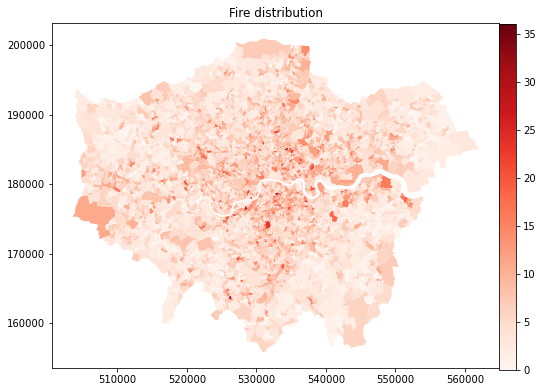

In [7]:
vmin, vmax = np.min(zone['fire']), np.max(zone['fire']) 
ax = zone.plot('fire', vmin=vmin, vmax=vmax, figsize=(8,8), cmap='Reds')
ax.set_title('Fire' + ' distribution')
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.2, 0.03, 0.6])
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='Reds')
sm._A = []
fig.colorbar(sm, cax=cax)
plt.savefig('1.png', dpi=300, pad_inches=0, bbox_inches='tight')

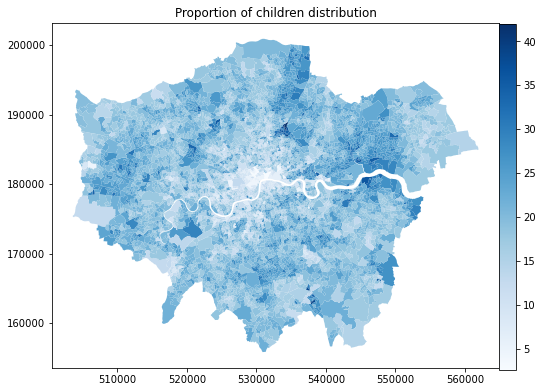

In [8]:
vmin, vmax = np.min(zone['0_15']), np.max(zone['0_15']) 
ax = zone.plot('0_15', vmin=vmin, vmax=vmax, figsize=(8,8), cmap='Blues')
ax.set_title('Proportion of children' + ' distribution')
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.2, 0.03, 0.6])
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='Blues')
sm._A = []
fig.colorbar(sm, cax=cax)
plt.savefig('2.png', dpi=300, pad_inches=0, bbox_inches='tight')

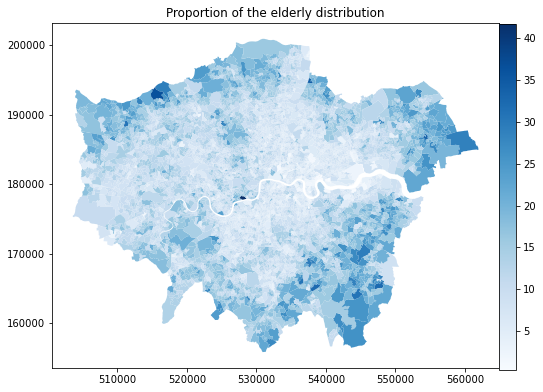

In [9]:
vmin, vmax = np.min(zone['65_']), np.max(zone['65_']) 
ax = zone.plot('65_', vmin=vmin, vmax=vmax, figsize=(8,8), cmap='Blues')
ax.set_title('Proportion of the elderly' + ' distribution')
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.2, 0.03, 0.6])
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='Blues')
sm._A = []
fig.colorbar(sm, cax=cax)
plt.savefig('3.png', dpi=300, pad_inches=0, bbox_inches='tight')

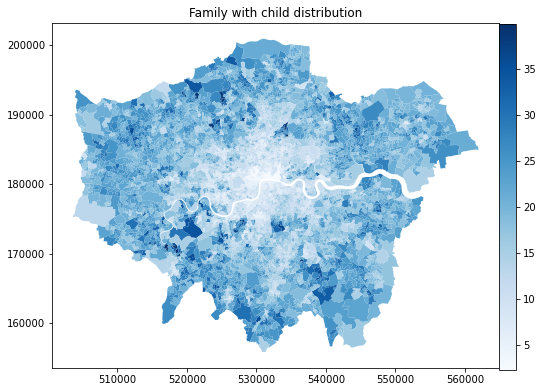

In [10]:
vmin, vmax = np.min(zone['children']), np.max(zone['children']) 
ax = zone.plot('children', vmin=vmin, vmax=vmax, figsize=(8,8), cmap='Blues')
ax.set_title('Family with child' + ' distribution')
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.2, 0.03, 0.6])
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='Blues')
sm._A = []
fig.colorbar(sm, cax=cax)
plt.savefig('4.png', dpi=300, pad_inches=0, bbox_inches='tight')

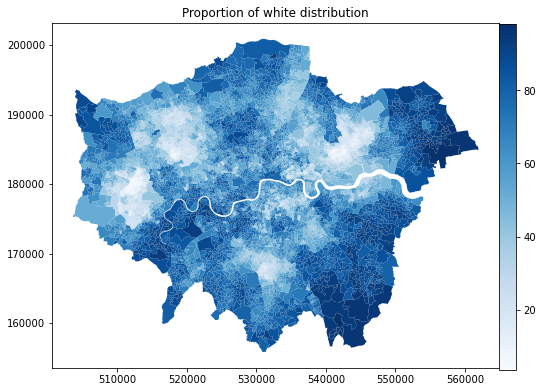

In [11]:
vmin, vmax = np.min(zone['white']), np.max(zone['white']) 
ax = zone.plot('white', vmin=vmin, vmax=vmax, figsize=(8,8), cmap='Blues')
ax.set_title('Proportion of white' + ' distribution')
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.2, 0.03, 0.6])
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='Blues')
sm._A = []
fig.colorbar(sm, cax=cax)
plt.savefig('5.png', dpi=300, pad_inches=0, bbox_inches='tight')

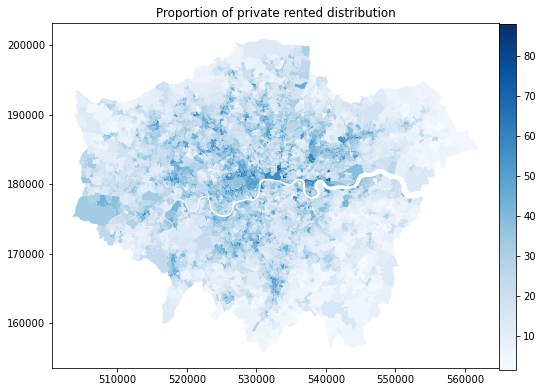

In [12]:
vmin, vmax = np.min(zone['private']), np.max(zone['private']) 
ax = zone.plot('private', vmin=vmin, vmax=vmax, figsize=(8,8), cmap='Blues')
ax.set_title('Proportion of private rented' + ' distribution')
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.2, 0.03, 0.6])
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='Blues')
sm._A = []
fig.colorbar(sm, cax=cax)
plt.savefig('6.png', dpi=300, pad_inches=0, bbox_inches='tight')

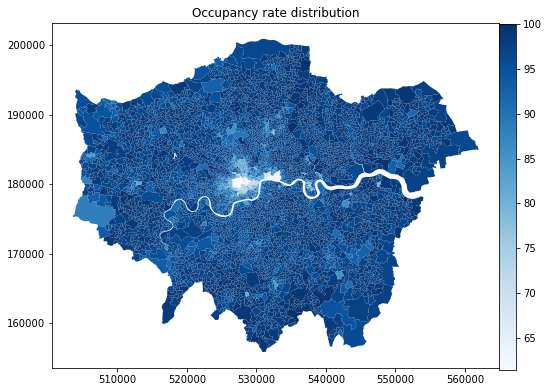

In [13]:
vmin, vmax = np.min(zone['usual']), np.max(zone['usual']) 
ax = zone.plot('usual', vmin=vmin, vmax=vmax, figsize=(8,8), cmap='Blues')
ax.set_title('Occupancy rate' + ' distribution')
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.2, 0.03, 0.6])
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='Blues')
sm._A = []
fig.colorbar(sm, cax=cax)
plt.savefig('7.png', dpi=300, pad_inches=0, bbox_inches='tight')

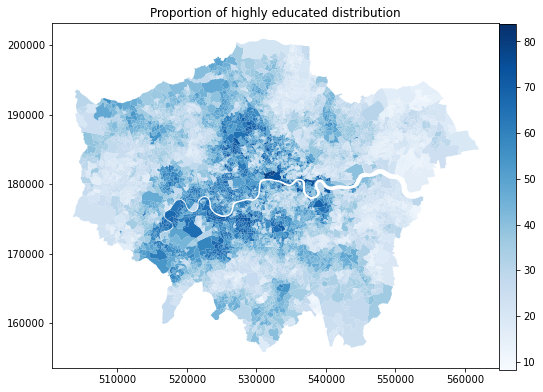

In [14]:
vmin, vmax = np.min(zone['qualificat']), np.max(zone['qualificat']) 
ax = zone.plot('qualificat', vmin=vmin, vmax=vmax, figsize=(8,8), cmap='Blues')
ax.set_title('Proportion of highly educated' + ' distribution')
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.2, 0.03, 0.6])
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='Blues')
sm._A = []
fig.colorbar(sm, cax=cax)
plt.savefig('8.png', dpi=300, pad_inches=0, bbox_inches='tight')

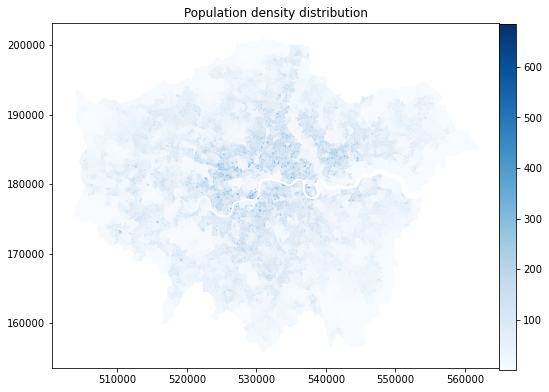

In [15]:
vmin, vmax = np.min(zone['density']), np.max(zone['density']) 
ax = zone.plot('density', vmin=vmin, vmax=vmax, figsize=(8,8), cmap='Blues')
ax.set_title('Population density' + ' distribution')
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.2, 0.03, 0.6])
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='Blues')
sm._A = []
fig.colorbar(sm, cax=cax)
plt.savefig('9.png', dpi=300, pad_inches=0, bbox_inches='tight')

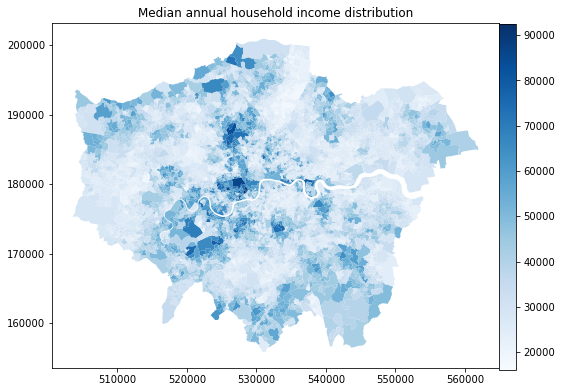

In [16]:
vmin, vmax = np.min(zone['Income']), np.max(zone['Income']) 
ax = zone.plot('Income', vmin=vmin, vmax=vmax, figsize=(8,8), cmap='Blues')
ax.set_title('Median annual household income' + ' distribution')
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.2, 0.03, 0.6])
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='Blues')
sm._A = []
fig.colorbar(sm, cax=cax)
plt.savefig('10.png', dpi=300, pad_inches=0, bbox_inches='tight')

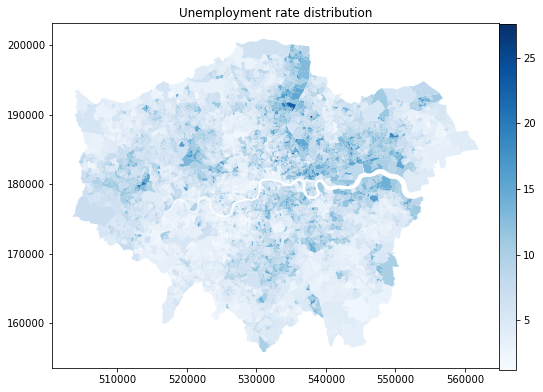

In [17]:
vmin, vmax = np.min(zone['unemploy']), np.max(zone['unemploy']) 
ax = zone.plot('unemploy', vmin=vmin, vmax=vmax, figsize=(8,8), cmap='Blues')
ax.set_title('Unemployment rate' + ' distribution')
fig = ax.get_figure()
cax = fig.add_axes([0.9, 0.2, 0.03, 0.6])
sm = plt.cm.ScalarMappable(norm=plt.Normalize(vmin=vmin, vmax=vmax), cmap='Blues')
sm._A = []
fig.colorbar(sm, cax=cax)
plt.savefig('11.png', dpi=300, pad_inches=0, bbox_inches='tight')